In [1]:
# Network Data Science 
import networkx as nx

# Data Wrangling
import numpy as np

# Network Data Analysis 
import networkx as nx
import geonetworkx as gnx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import netwulf as nw
%pylab inline

# Geo-Spatial Data Analysis
import geopandas as gpd
###import georaster as gr
import pandas as pd
from shapely.geometry import Point, LineString
###import pysal as ps
###from pysal.contrib.viz import mapping as maps

# Other Utilities
from operator import itemgetter
from collections import defaultdict

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


In [2]:
mobility_data = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/Pepe2020/flow.csv")[['origin','destination','flow']].rename(columns={'origin':'source', 'destination':'target', 'flow':'weight'})
mobility_edgelist = [tuple(weighted_edge) for weighted_edge in mobility_data.to_numpy()]
#mobility_edgelist

In [7]:
mobility_graph = nx.DiGraph()
mobility_graph.add_weighted_edges_from(mobility_edgelist)
type(mobility_graph)
#nw.visualize(mobility_graph)

networkx.classes.digraph.DiGraph

In [4]:
#nx.draw(mobility_graph)
###mobility_adj_matrix = nx.adj_matrix(mobility_graph)

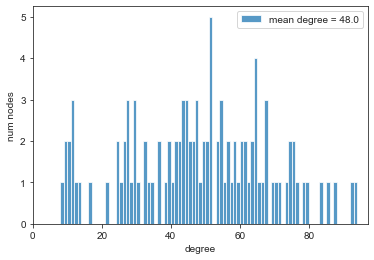

In [14]:
plot_degree_distn(mobility_graph)

## Simulations 

In [ ]:
# Model Parameters
mu = 0.2           # Recovery rate 
lambd = 0.01       # Transmission rate per contact

# Simulation Parameters
nrun = 100        # Number of runs
 
# Multi-Run Simulation
runs = depi.network_SIR_multirun_simulation(mobility_graph, nrun = nrun, lambd = lambd, mu = mu)

# Set figure size 
plt.figure(figsize=(10,7))
plt.title('Stochastic SIR on Mobility Graph | 100 Runs', fontsize = 18)

# Plot the ensemble of trajectories
depi.plot_ensemble(runs)      

### $\lambda$-Sensitivity of Final Epidemic Size

In [ ]:
# Perform lambda-sensitivity analysis of final epidemic size (normalized attack rate) 
data = depi.network_SIR_finalsize_lambda_sensitivity(mobility_graph, mu = mu, rho = 0.05, # rho = initial fraction infected
                                                    lambda_min = 0.0001, lambda_max = 1.0, 
                                                    nruns = 20)
# Show sensitivity dataset
data 

# Set figure size 
plt.figure(figsize=(10,7))

# Display a boxplot with final epidemic size vs. transmission rate per edge/contact
depi.boxplot_finalsize_lambda_sensitivity(mobility_graph, mu = mu, data = data, 
                                         ymin = 0.045, ymax= 1.1,
                                         xlim = (0.00007, 1.5) )